# Score of companies

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

pd.options.mode.chained_assignment = None  # default='warn'

In [13]:
def cmap_bann():   
    lista_cores = ['lightsteelblue','royalblue','darkblue']   
    n_bin = 20   
    cmap_name = 'cmap_bann'
    cmap = LinearSegmentedColormap.from_list(cmap_name, lista_cores, N=n_bin)

    return cmap

def pallete_bann(df,coluna,pallete_cor):
    pal = sns.color_palette(pallete_cor, len(df))
    rank = df[coluna].argsort().argsort() 
    pallete = np.array(pal[::-1])[rank]
    
    return pallete
    

In [21]:
df_o = pd.read_csv('DataEngineer.csv')

df = df_o

df.head(4)

df['Location'].unique()

df_o = df.loc[df['Location'].isin(['New York, NY','Los Angeles, CA','Austin, TX'])]
df_o = df_o.loc[df_o['Size']!='-1']
df_o = df_o.loc[df_o['Size']!='Unknown']


### Status de pendências do WF de cadastros de peças

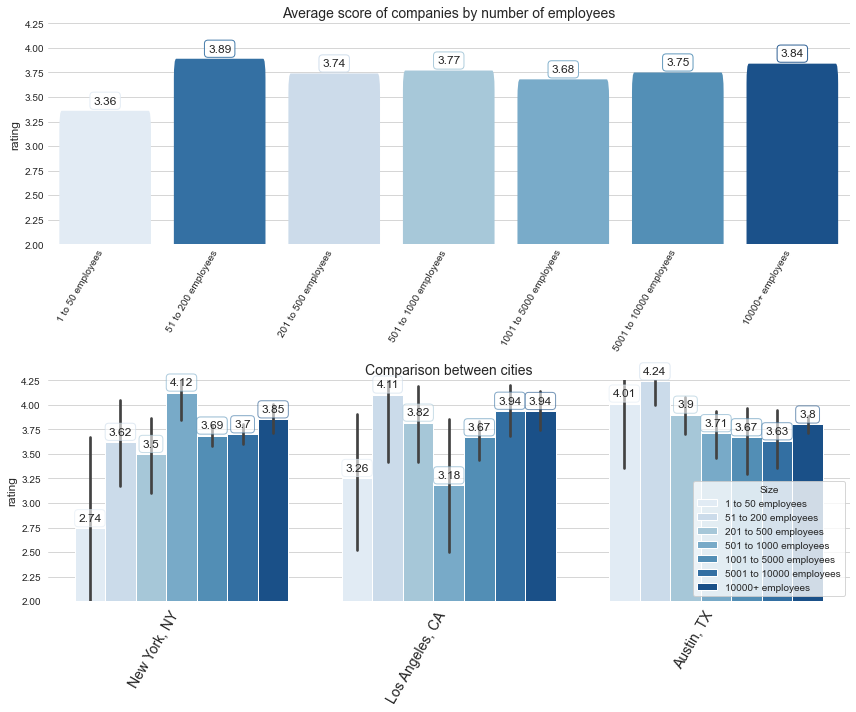

In [23]:
prod, ax = plt.subplots(2, figsize=(12, 10), sharex=False)

df = df_o

df = df.groupby(['Size']).mean()
df = round(df['Rating'],2)
df = df.reset_index()

ordem = ['1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']
sns.set_style('whitegrid')
#f, ax = plt.subplots(figsize=(12,4))
sns.barplot(x='Size',y='Rating',data=df,ax=ax[0],palette=pallete_bann(df,'Rating','Blues_r'),order=ordem)


#ax[0].legend(bbox_to_anchor= (1, 1),loc='upper right' )

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=60, ha='right', fontsize = 10)
titulo = 'Average score of companies by number of employees'
ax[0].set_title(titulo, fontsize=14)
ax[0].set_xlabel('', fontsize=12)
ax[0].set_ylabel('rating', fontsize=12)
ax[0].set(ylim=(2,4.25))

     
for p in ax[0].patches:
    ax[0].annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   va = 'center', 
                   size=12,
                   xytext = (0, + 10), 
                   textcoords = 'offset points',
                   bbox=dict(boxstyle='round', fc='w',ec=p.get_facecolor(),alpha=0.9),                      
                  )

from matplotlib.patches import FancyBboxPatch

new_patches = []
for patch in reversed(ax[0].patches):
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.000010,rounding_size=0.02",
                            ec="none", fc=color,
                            mutation_aspect=10
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax[0].add_patch(patch)
    
sns.despine(left=True, bottom=True)
ax[0].tick_params(axis=u'both', which=u'both', length=0)    
    

#######################################################################################################
df = df_o
sns.set_style('whitegrid')

sns.barplot(x='Location',y='Rating',data=df,hue= 'Size',ax=ax[1],palette = 'Blues',hue_order=ordem)


ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=60, ha='right', fontsize = 14)
titulo = 'Comparison between cities'
ax[1].set_title(titulo, fontsize=14)
ax[1].set_xlabel('', fontsize=12)
ax[1].set_ylabel('rating', fontsize=12)
ax[1].set(ylim=(2,4.25))

# Texto acima da barra
for p in ax[1].patches:
    ax[1].annotate(round(p.get_height(),2), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   va = 'center', 
                   size=12,
                   xytext = (0, + 10), 
                   textcoords = 'offset points',
                   bbox=dict(boxstyle='round', fc='w',ec=p.get_facecolor(),alpha=0.6),                      
                  )



prod.tight_layout()